### Grupo 2

Esteban Neira Mejía - 1010010026

Mateo Cardona - 1193460101

Juan Diego Castaño - 1002634927

# Libraries

In [2]:
!pip install control

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install lcapy

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [4]:
!apt-get update && apt-get install -y --no-install-recommends \
    #texlive-fonts-recommended \
    #texlive-latex-extra \
    #texlive-fonts-extra \
    #dvipng \
    #lmodern

Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian-security buster/updates InRelease [34.8 kB]
Get:3 http://deb.debian.org/debian buster-updates InRelease [56.6 kB]
Get:4 http://deb.debian.org/debian buster/main amd64 Packages [7,909 kB]
Get:5 http://deb.debian.org/debian-security buster/updates/main amd64 Packages [497 kB]
Get:6 http://deb.debian.org/debian buster-updates/main amd64 Packages [8,788 B]
Fetched 8,628 kB in 2s (3,675 kB/s)




0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [5]:
## IMPORTAMOS LAS LIBRERIAS PARA EL MANEJO DEL SISTEMA SLIT Y SISTEMAS MATEMATICOS
## RAZONAMIENTO MATEMATICO######################
import numpy as np
from scipy.signal import lti 
from scipy import stats
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft, fftfreq, fftshift
import scipy.signal as sig
import seaborn as sns ## LIBRERIA PARA HISTOGRAMA 
from numpy import logspace
import sympy as sym
import pandas as pd
######################
# ############################


from control.matlab import *
import control as ct

import pylab as pl
import math


##### GRAFICACIÓN#######################
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
########################################


##MANEJO DEL CIRCUITO###########################
from lcapy import Circuit, j, omega, s
################################################

# Maximum Likelihood Estimator Class

In [6]:
class MLE():      # Maximum Likelihood Estimation
    

  def __init__(self,X_function_data: np.array, plot=True, histogram=True):
    self.X_function_data=X_function_data
    self.plot=plot
    self.histogram=histogram
    self.size=len(self.X_function_data)



  def Exponential(self,value_limits: np.array, espace:  float=0.1):
    """ 
    Function that performs MLE with an exponential distribution
    ---------------------------------------------------------------
    Parameters
    ---------------------------------------------------------------
    value_limits{np.array} - Array with 2 values that represent the 
    limits of the array with the values for the exponentical function.

    espace{float} - constant for the spacing of the vector. [Default:0.1]

    Returns
    --------------------------------------------------------------
    lambda_estimate{float} - The ESTIMATED parameter lambda for the
    exponential distribution
    estimated_exponential{np.array} - The complete ESTIMATED PDF
    """  

    lambda_values = np.arange(value_limits[0],value_limits[1],espace)
    log_estimation=self.size*np.log(lambda_values)-lambda_values*np.sum(self.X_function_data)
    positionmax=np.where( log_estimation== np.amax(log_estimation))
    lambda_estimate=lambda_values[positionmax]
    estimated_exponential=np.random.exponential(1/lambda_estimate,size=self.size)
    if (self.plot):
      plt.figure(figsize=(6,6))
      plt.plot(lambda_values, log_estimation)
      plt.xlabel('$\lambda$')
      plt.ylabel('log likelihood')
      plt.plot(lambda_estimate,log_estimation[positionmax],color="green",label="Lambda Estimated: {}".format(lambda_estimate),marker='o')
      plt.legend()
      plt.show()
    if (self.histogram):
      Nbins = int(1 + 3.322*np.log2(self.size))
      plt.figure(figsize=(8,8))
      plt.hist(self.X_function_data,bins=Nbins,color="orange",label="Original")
      plt.hist(estimated_exponential,bins=Nbins,color="blue",label="Estimation-lambda{}".format(lambda_estimate))
      plt.legend()
      plt.title("Original and estimated comparison")  

    return lambda_estimate,estimated_exponential  






  def Uniform(self,vectorA, vectorB, n):
    """
    Function that performs MLE with an Uniform Distribution
    ---------------------------------------------------------
    Parameters
    ---------------------------------------------------------
    vectorA{np.array} - Array with 2 values that represent the 
    vector of parameter A

    vectorB{np.array} - Array with 2 values that represent the 
    vector of parameter B

    n{int or float} - constant for the number of samples to be 
    taken

    Returns
    ---------------------------------------------------------
    A_estimate{np.array} - Array with the ESTIMATED vector A
    B_estimate{np.array} - Array with the ESTIMATED vector B
    Uniform_Estimate{np.array} - The ESTIMATED distribution
    """
    ## GENERAMOS VECTOR DE A Y B
    A = np.linspace(vectorA[0], vectorA[1], n)
    B = np.linspace(vectorB[0], vectorB[1], n)
    A, B = np.meshgrid(A, B) ## GENERO LAS COMBINACIONES POSIBLES PARA A Y B
    log = -self.size*np.log(B-A)
    positionmax=np.where( log== np.amax(log))
    A_estimate=A[positionmax[0],positionmax[1]]
    B_estimate=B[positionmax[0],positionmax[1]]
    ## GENERAMOS LA UNIFORME ESTIMADA
    Uniform_Estimate = np.random.uniform(A_estimate,B_estimate,self.size); 
    if(self.plot):
      fig=pl.figure(figsize=(6,6))
      ax=Axes3D(fig)
      ax.plot_surface(A,B,log)
      pl.title("log likelihood of uniform [A and B] ")
      pl.show()
    if(self.histogram):
      Nbins = int(1 + 3.322*np.log2(self.size))
      plt.figure(figsize=(8,8))
      plt.hist(self.X_function_data,bins=Nbins,color="orange",label="Original")
      plt.hist(Uniform_Estimate,bins=Nbins,color="blue",label="Estimation-A {}-B {}".format(A_estimate,B_estimate))
      plt.legend()
      plt.title("original and estimated comparison")
      plt.show()
    return A_estimate,B_estimate,Uniform_Estimate  



  def Gaussian(self,median_limits: np.array, varian_limits: np.array,espace : float =0.10):
     """
      Function that make the MVE with a gaussian distribution
      ---------------------------------------------------------------
      Parameters
      ---------------------------------------------------------------
      median_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible means.

      varian_limits{np.array}--array with 2 values that means the limits of the arrays of
      possible variances.
      espace{float}--constant  for the spacing of the vector of means and variances

      Returns
      ---------------------------------------------------------------
      media_estimate{float}-- THE ESTIMATED AVERAGE FOR THE FUNCTION 
      varian_estimate{float}-- THE ESTIMATED VARIANCE FOR THE FUNCTION
      gaussian_estimate{np.array}-- THE ESTIMATED DISTRIBUTION

     """  
     
     media = np.arange(median_limits[0], median_limits[1], espace)
     varian = np.arange(varian_limits[0], varian_limits[1], espace)
     media, varian = np.meshgrid(media, varian)
     log = -(self.size/2*np.log(2*np.pi)+self.size/2*np.log(varian)+(np.sum(np.square(self.X_function_data))-2*media*np.sum(self.X_function_data)\
                                                   +self.size*media**2)/(2*varian))
     posicionmax=np.where( log== np.amax(log))
     media_estimate=media[posicionmax[0],posicionmax[1]]
     varian_estimate=varian[posicionmax[0],posicionmax[1]]


     
     if(self.plot):
      fig=pl.figure(figsize=(6,6))
      ax=Axes3D(fig)
      ax.plot_surface(media,varian,log)
      pl.title("log likelihood of gaussian [mean(X) and varianza[Y]] ")
      pl.show()

     gaussian_estimate= np.random.normal(media_estimate, np.sqrt(varian_estimate), N)  
     if(self.histogram):
       Nbins = int(1 + 3.322*np.log2(self.size))
       plt.figure(figsize=(8,8))
       plt.hist(self.X_function_data,bins=Nbins,color="orange",label="Original")
       plt.hist(gaussian_estimate,bins=Nbins,color="blue",label="Estimation-Varian {}-median {}".format(varian_estimate,media_estimate))
       plt.legend()
       plt.title("original and estimated comparison")

    
     return media_estimate,varian_estimate,gaussian_estimate

In [7]:
##FUNCIONES A UTILIZAR (TRANSFORMADA DE FOURIER)
#Función que Gráfica la transformada de Fourier y la función en el tiempo:
def fftp(t, signal,x,y=None):          #X es el intervalo simétrico en que quiero graficar el dominio de la frecuencia F.
  ft = fftshift(fft(signal))   #Saca la transformada de fourier centrada en cero(fft calcula la transformada de fourier como tal y el fftshift la centra). La fft es un algoritmo para calcular la transformada discreta de Fourier.
  w = fftshift(fftfreq(ft.shape[0],t[1]-t[0]))  #Se le saca el vector de frecuencias(Obviamente el vector de frecuencia debe tener el mismo tamaño del vector de tiempo y obviamente x(t) tiene el mismo tamaño que X(w))(ft.shape[0] es el tamaño del vector transformada de Fourier). También se utiliza el fftshift para lo mismo. El primer parámetro de fftfreq es el tamaño del vector de frecuencia y el segundo es el delta que hay entre cada w y por tanto entre cada t.
  mag = np.sqrt((ft.real**2)+(ft.imag**2))   #Magnitud del espectro
  phase = np.arctan(ft.imag/ft.real)         #Fase del espectro

  #Grafica de la señal en el tiempo:
  plt.figure(figsize=(14,12))   #Tamaño de la imagen de la gráfica
  plt.subplot(511) 
  plt.title('x(t)')
  plt.plot(t, signal)
  plt.grid()
  #Grafica de la parte imaginaría de la transformada de Fourier:
  plt.figure(figsize=(14,12))
  plt.subplot(512)  #Tengo 5 gráficas (Esta está en la columna 1, fila 2) 
  plt.title('Im{TF}')
  plt.plot(w, ft.imag)
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la parte real de la transformada de Fourier:
  plt.figure(figsize=(14,12))
  plt.subplot(513)  #Tengo 4 gráficas (Esta está en la columna 1, fila 2) 
  plt.title('Re{TF}')
  plt.plot(w, ft.real)
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la magnitud de la transformada de Fourier:
  plt.subplot(514)
  plt.plot(w,mag)
  plt.title('|FT|')
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  #Gráfica de la fase -de la transformada de Fourier:
  plt.subplot(515)
  plt.plot(w,phase,'-',color='orange') #Grafica continua
  plt.stem(w,phase) #Grafica discreta
  plt.title('Phase')
  plt.grid()
  if y!=None:
     plt.ylim(-y,y)
  plt.xlim(-x,x)
  plt.xlabel('Frequency [Hz]')
  plt.show()


def Ploteo_tiempo_frecuencia2(tiempo,Funcion_tiempo,xmax=None,ymax=None):
    # La frequencia de muestreo la extraigo del vector del tiempo
    Frecuencia_muestreo= t[1] - t[0]
    Y = fftshift(fft(Funcion_tiempo))  
    W = fftshift(fftfreq(Y.shape[0], Frecuencia_muestreo))  # Vector de frecuencias
    
    #  Inicializa la figura con un tamaño adecuado 
    Ym = Y.mean()
    print(Ym)
    plt.figure(figsize=(25, 5), dpi=90)
    plt.plot(W, Y, color='C1')  # grafica el contorno
    plt.title('Representación en Frecuencia')    
    plt.grid(True)
    if xmax!=None: 
          plt.xlim(-xmax,xmax)
    if ymax!=None:
          plt.ylim(-ymax,ymax)
    plt.xlabel('Frequencia [KHz]')
    plt.ylabel('Amplitud')
    plt.show()

    return Ym

# Gaussian Random Signal

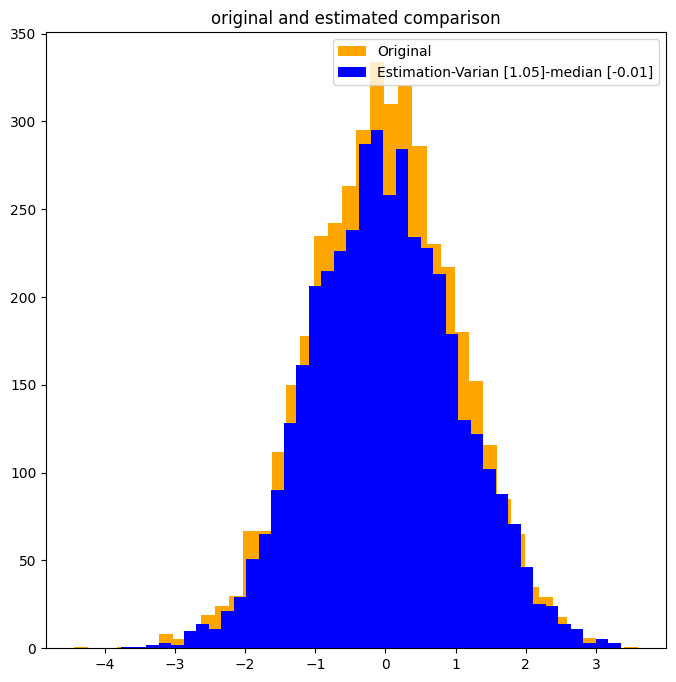

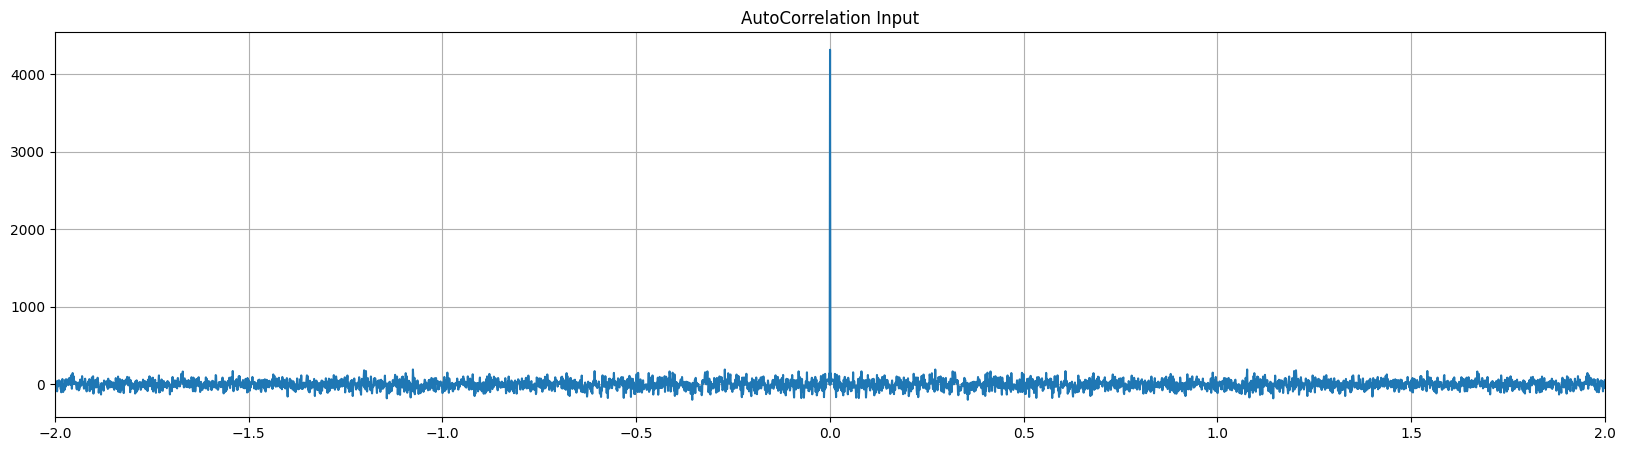

In [9]:
  """
  GAUSS
  """

t = np.linspace(0,4,4096)  

N =  4096 # // numero de muestras 
  #   parameter vector \theta=\mu, \sigma^2
μ  = 0 #MEDIA
sigma = (1)**2 #VARIANZA
x = np.random.normal(μ, np.sqrt(sigma), N) ## FDP GAUSSIANA REAL   
MVE1=MLE(x,plot=False) ## TENGO MIS DATOS GUARDADOS 
Values_mean = np.array([μ-2*sigma, μ+2*sigma]) ##VECTOR DE MEDIAS 
Values_var = np.array([sigma/2, 1.5*sigma]) # VECTOR DE VARIANZAS
espace=0.01
media_estimate,varian_estimat,gaussian_estimate=MVE1.Gaussian(Values_mean,Values_var,espace)

Autocorrelacion_Entrance=np.correlate(x,x,mode="same") ## GENERAMOS LA AUTOCORRELACION

plt.figure(figsize=(20,5))
plt.plot(t-2,Autocorrelacion_Entrance)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("AutoCorrelation Input")
plt.grid()
plt.show()

(-21.906591292115017+0j)
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


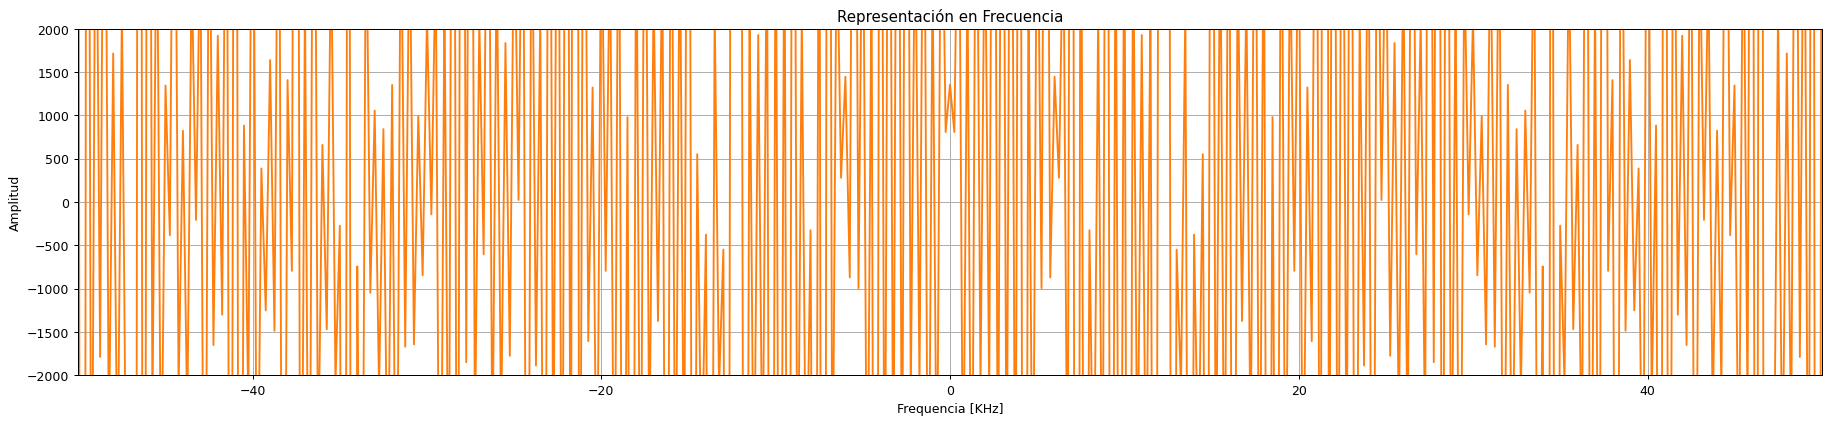

In [10]:
## GENEREMOS SU TRANSFORMADA PARA CONOCER LA DENSIDAD DE POTENCIA:
mean =  Ploteo_tiempo_frecuencia2(t,Autocorrelacion_Entrance,xmax=50,ymax=2000)

# High Pass circuit

In [11]:
########### CONTRUIMOS EL CIRCUITO##########################:

ctt=Circuit("""
Vi 1 0_1 step;down
C1 1 2; right, size=1.5
R1 2 0; down, size=1.5
C2 2 3; right, size=1.5
R3 2 3; right, offset=0.7
R2 3 0_3; down , v=(V_o)
W 0_1 0;right
W 0 0_3;right
"""
)

In [12]:
##GENERAMOS LA FUNCIÓN DE TRANSFERENCIA DEL CIRCUITO TOMANDO LA SALIDA EN R2
H=(ctt.R2.V(s)/ctt.Vi.V(s)).simplify()
H

                            C₁⋅R₁⋅R₂⋅s⋅(C₂⋅R₃⋅s + 1)                          
──────────────────────────────────────────────────────────────────────────────
                2                                                             
C₁⋅C₂⋅R₁⋅R₂⋅R₃⋅s  + R₁ + R₂ + R₃ + s⋅(C₁⋅R₁⋅R₂ + C₁⋅R₁⋅R₃ + C₂⋅R₁⋅R₃ + C₂⋅R₂⋅R

  
──
  
₃)

In [13]:
#Dando valores al circuito:
C1=4.7e-6
C2=4.7e-6
R1=10000
R2=2500
R3=1000
Coeficientes_num=[C1*C2*R1*R2*R3, C1*R1*R2, 0] #Coeficientes numerador
Coeficientes_dem=[C1*C2*R1*R2*R3, C1*R1*R2 + C1*R1*R3 + C2*R1*R3 + C2*R2*R3, R1 + R2 + R3] #Coeficientes denominador

# Transfer Function - Impulse Response

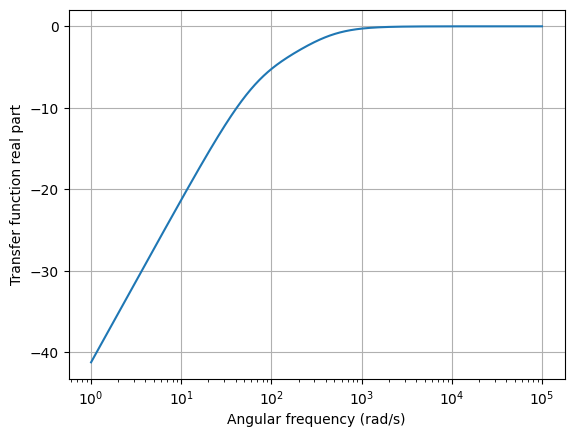

In [14]:
### LE ASIGNAMOS LOS VALORES A NUESTRA FUNCIÓN DE TRANSFERENCIA PARA VER EL COMPORTAMIENTO DEL CIRCUITO
### ASOCIADO A LOS PARAMETROS:
H_valores=H.subs("C1",C1).subs("C2",C2).subs("R1",R1).subs("R2",R2).subs("R3",R3)
W=logspace(0,5,2000) ## GENERAMOS VECTOR DE FRECUENCIAS EN ESCALA LOGARITMICA
X=H_valores(j*omega).dB.plot(W,log_frequency=True) ## GRAFICAMOS SEGUN UN VECTOR DE FRECUENCIAS

In [15]:
sys = ct.tf(Coeficientes_num,Coeficientes_dem)

(array([0.08630923, 0.08689803, 0.08749072, 0.0880873 , 0.08868781,
        0.08929227, 0.08990069, 0.09051311, 0.09112954, 0.09175001,
        0.09237455, 0.09300317, 0.0936359 , 0.09427276, 0.09491377,
        0.09555897, 0.09620837, 0.09686199, 0.09751987, 0.09818202,
        0.09884846, 0.09951923, 0.10019435, 0.10087383, 0.1015577 ,
        0.102246  , 0.10293873, 0.10363593, 0.10433762, 0.10504383,
        0.10575457, 0.10646987, 0.10718976, 0.10791426, 0.1086434 ,
        0.1093772 , 0.11011568, 0.11085886, 0.11160679, 0.11235946,
        0.11311692, 0.11387919, 0.11464629, 0.11541824, 0.11619507,
        0.1169768 , 0.11776346, 0.11855507, 0.11935167, 0.12015326,
        0.12095987, 0.12177154, 0.12258828, 0.12341012, 0.12423708,
        0.12506919, 0.12590647, 0.12674894, 0.12759663, 0.12844957,
        0.12930777, 0.13017126, 0.13104007, 0.13191421, 0.13279371,
        0.1336786 , 0.1345689 , 0.13546463, 0.13636581, 0.13727248,
        0.13818464, 0.13910233, 0.14002556, 0.14

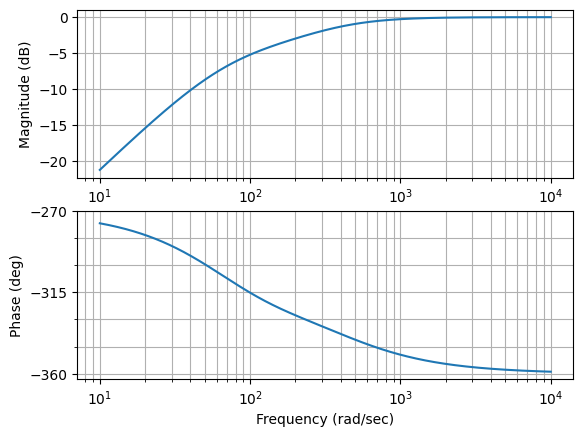

In [16]:
ct.bode(sys)

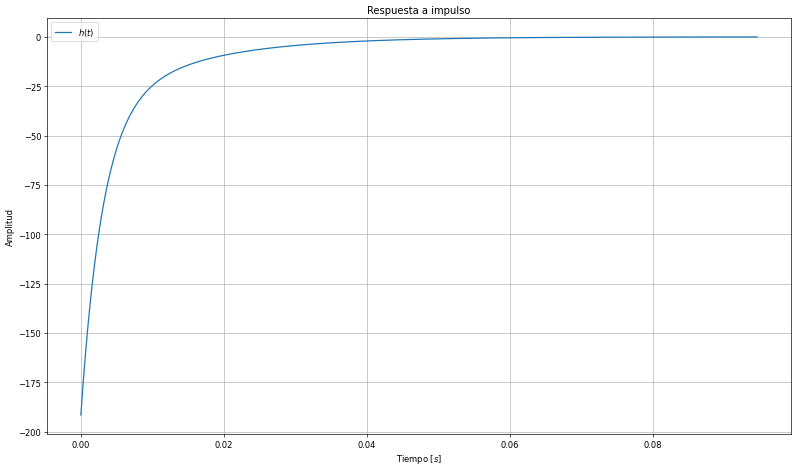

In [17]:
lti_system = lti(Coeficientes_num, Coeficientes_dem)   #LTI
Nsample=4096 ## CANTIDAD DE MUESTRAS
t, h = lti_system.impulse(N=Nsample) # sistema LTI exitado con la función impulso
## NOS DEVUELVE 

plt.figure(figsize=(16, 9), dpi=60)
plt.plot(t, h, label='$h(t)$')

plt.grid(True)
plt.legend()
plt.title("Respuesta a impulso")
plt.xlabel("Tiempo [$s$]")
plt.ylabel("Amplitud")
plt.show()

In [18]:
print('Impulse response median: ',h.mean())

Impulse response median:  -10.590686177024075


# Timebase Calibration

In [19]:
tsin = np.linspace(0,4,4096)
valor1 = np.cos(2 * np.pi * 1.5915494309 * tsin)  # Señal sinusoidal de 1 Hz
valor2 = np.cos(2 * np.pi * 15.9154943092 * tsin)  # Señal sinusoidal de 10 Hz
valor3 = np.cos(2 * np.pi * 159.1549430919 * tsin)  # Señal sinusoidal de 100 Hz

Text(0.5, 0, 'Time')

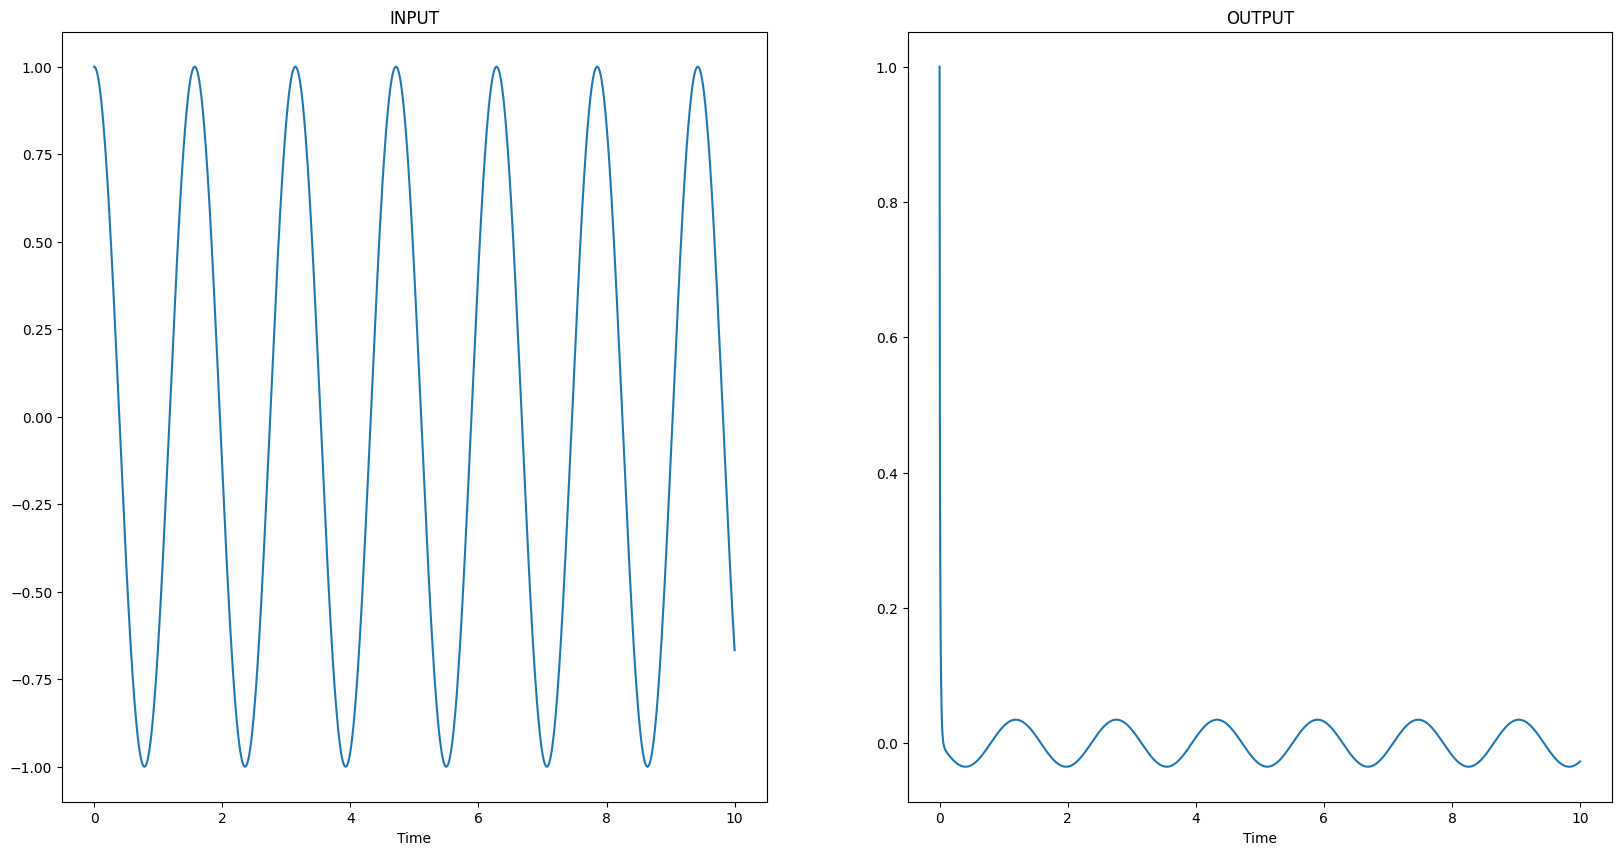

In [20]:
t1 = np.linspace(0,10,4096)

k1,Output_Circuit1,_ = lti_system.output(valor1,t1)

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t1, valor1)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k1, Output_Circuit1)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")



Text(0.5, 0, 'Time')

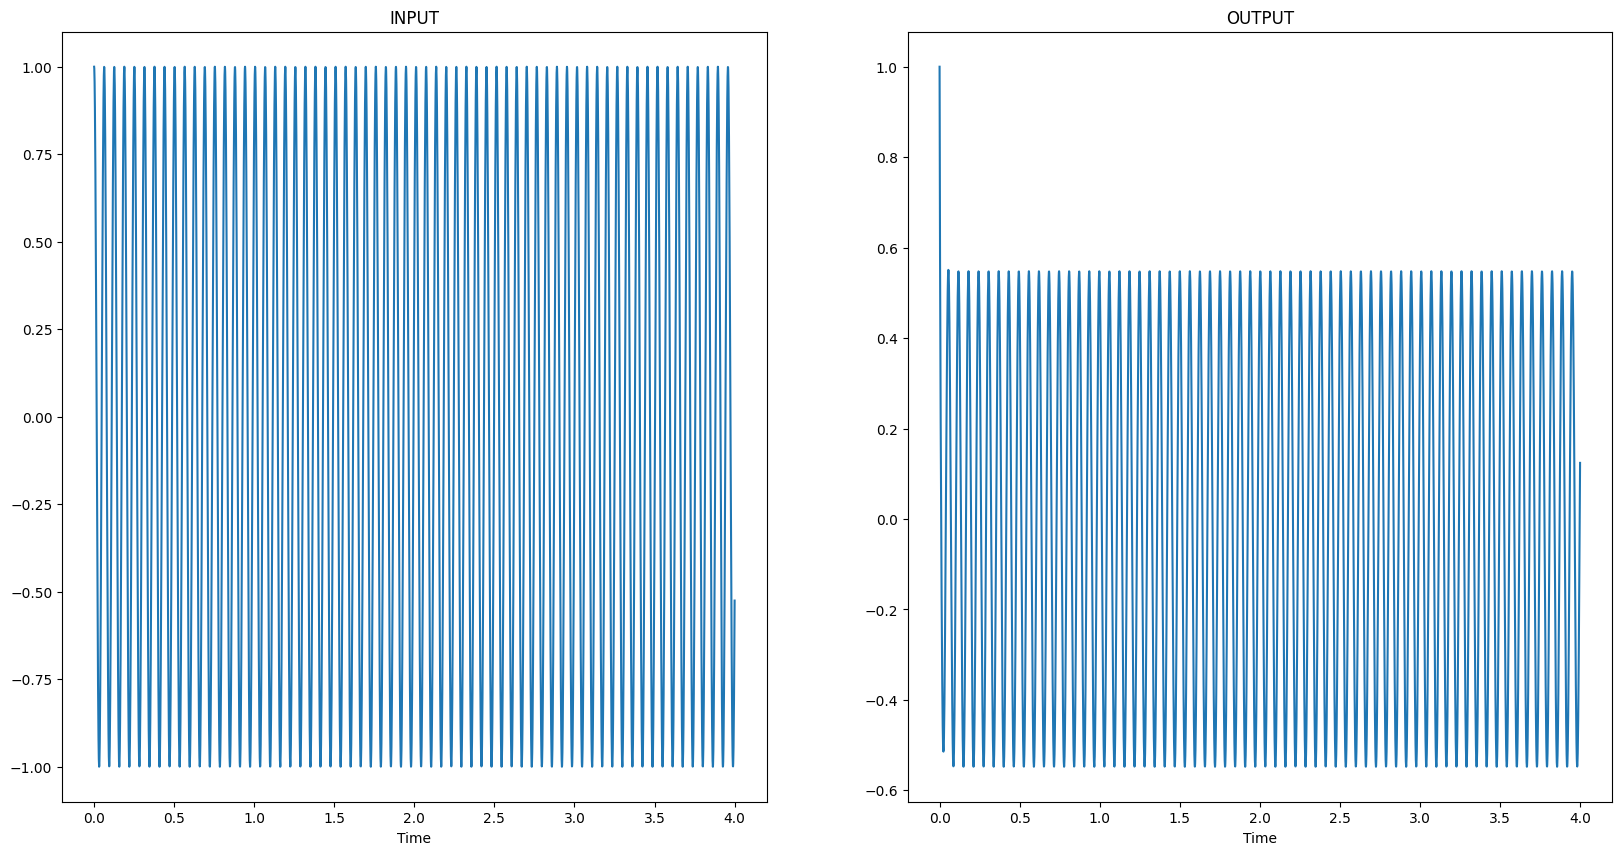

In [21]:
t2 = np.linspace(0,4,4096)

k2,Output_Circuit2,_ = lti_system.output(valor2,t2)

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t2, valor2)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k2, Output_Circuit2)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

Text(0.5, 0, 'Time')

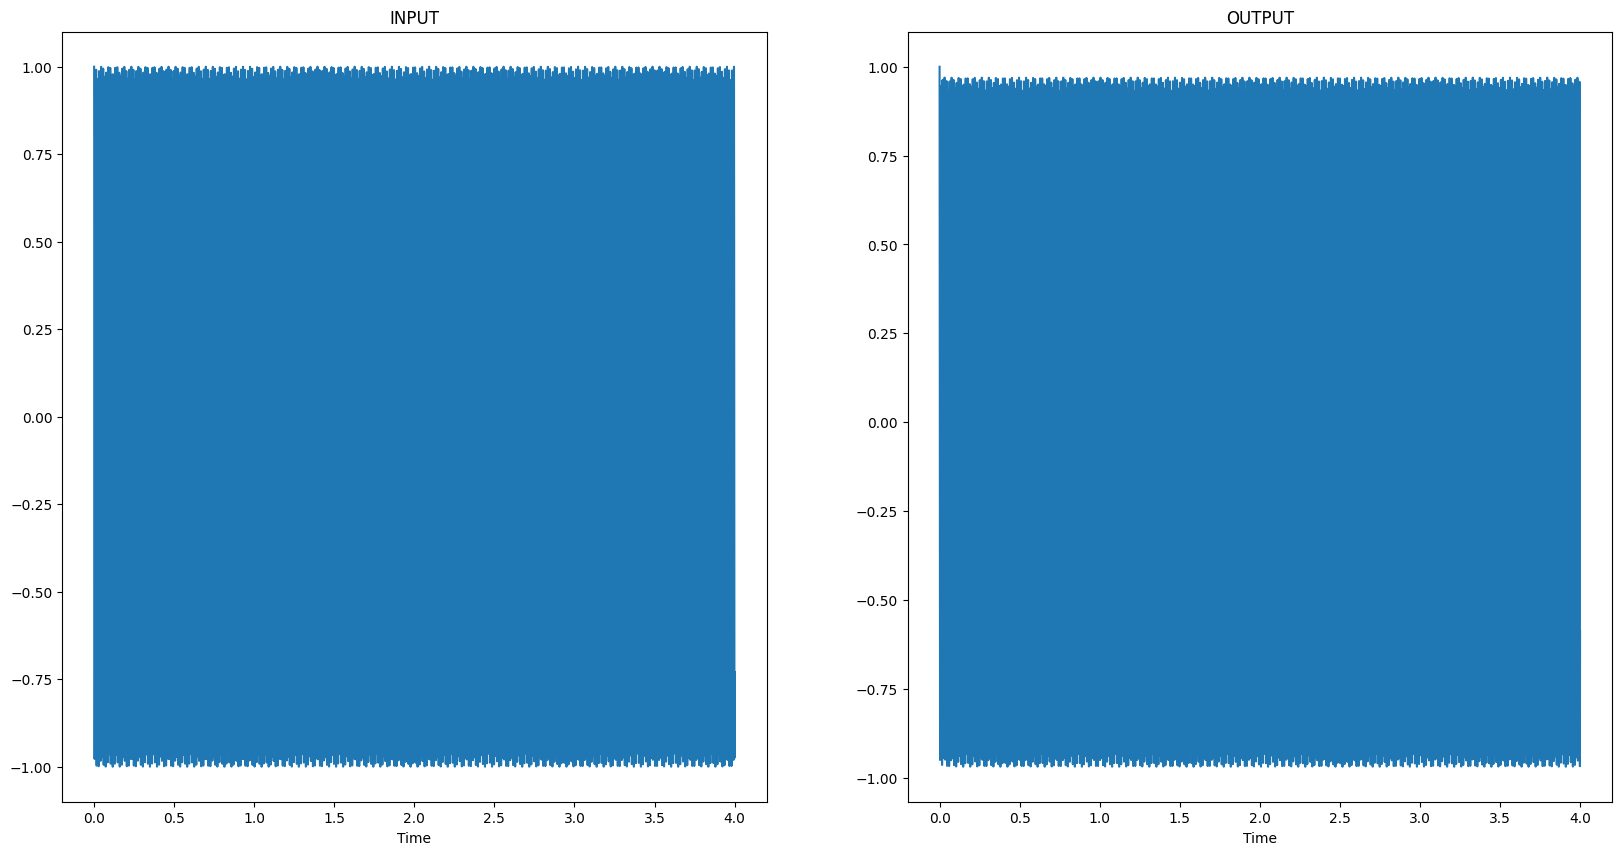

In [22]:
t3 = np.linspace(0,4,4096)

k3,Output_Circuit3,_ = lti_system.output(valor3,t3)

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t3, valor3)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k3, Output_Circuit3)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

In [23]:
findmax10 = Output_Circuit1[1000:]
findmax100 = Output_Circuit2[1000:]
findmax1000 = Output_Circuit3[1000:]

print(findmax10.max())
print(findmax100.max())
print(findmax1000.max())

0.03476778787569486
0.5477633766202145
0.9692292175290362


<function matplotlib.pyplot.show(close=None, block=None)>

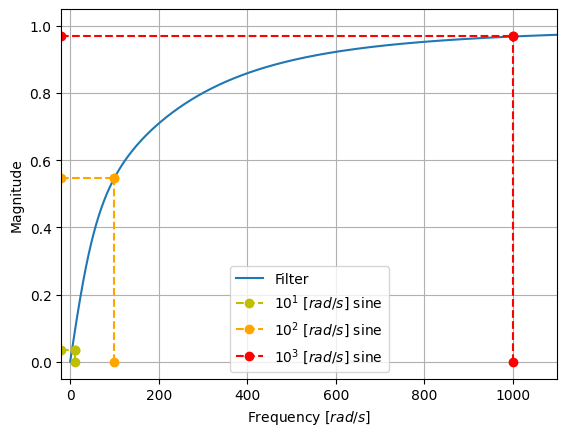

In [24]:
W=logspace(-1,4,2000)
w, mag ,_ = lti_system.bode(w=W)

mag = ct.db2mag(mag)

plt.figure()
plt.grid(True)
plt.xlim((-20,1100))
plt.plot(w,mag, label="Filter")

plt.plot([10, 10], [0, findmax10.max()], 'o--', color='y',label="$10^1$ [$rad/s$] sine")
plt.plot([-20, 10], [findmax10.max(), findmax10.max()], 'o--', color='y')

plt.plot([100, 100], [0, findmax100.max()], 'o--', color='orange',label="$10^2$ [$rad/s$] sine")
plt.plot([-20, 100], [findmax100.max(), findmax100.max()], 'o--', color='orange')

plt.plot([1000, 1000], [0, findmax1000.max()], 'o--', color='r',label="$10^3$ [$rad/s$] sine")
plt.plot([-20, 1000], [findmax1000.max(), findmax1000.max()], 'o--', color='r')

plt.xlabel("Frequency [$rad/s$]")
plt.ylabel("Magnitude")
plt.legend()
plt.show

# Output Parameter Estimation 

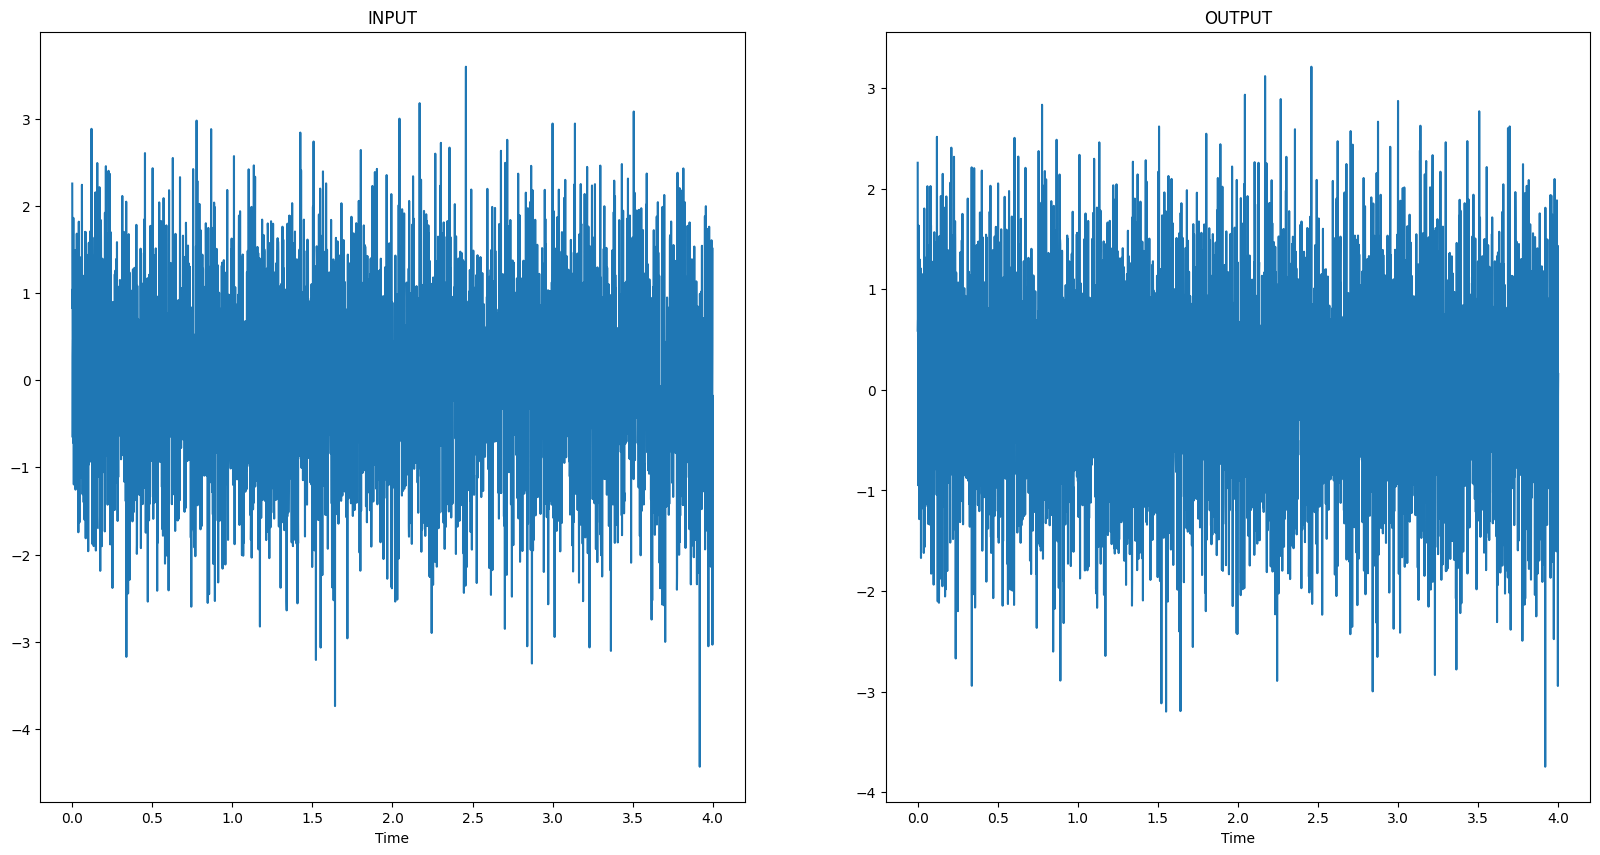

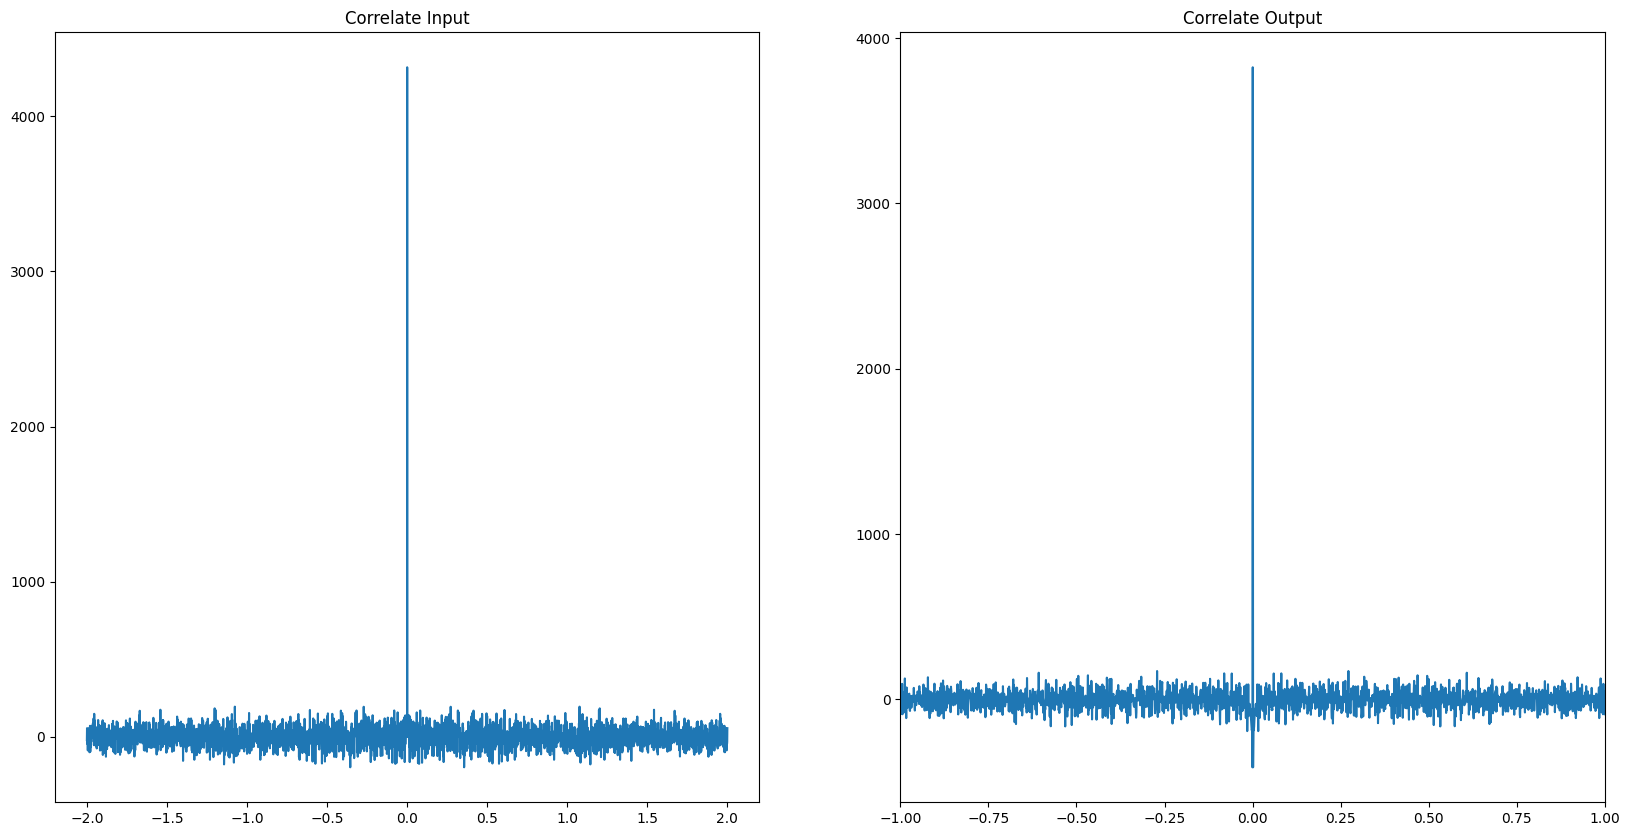

In [25]:
t = np.linspace(0,4,4096)
## INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
k,Output_Circuit,_=lti_system.output(x, t) ##SALIDA DEL CIRCUITO.
Autocorrelacion_Output=np.correlate(Output_Circuit,Output_Circuit,mode="same") ## GENERAMOS LA AUTOCORRELACION


# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, x)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k, Output_Circuit)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")


fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_Entrance)
axs[0].set_title("Correlate Input")
#axs[0].set_xlim(-0.05,0.05)
axs[1].plot(t-2, Autocorrelacion_Output)
axs[1].set_title("Correlate Output")
axs[1].set_xlim(-1,1)

In [32]:
meanC = Output_Circuit.mean()
print('Output median: ',meanC)
varC = Output_Circuit.var()
print('Output variance: ',varC)

Output median:  -0.0003403872220806062
Output variance:  0.9333184991714931


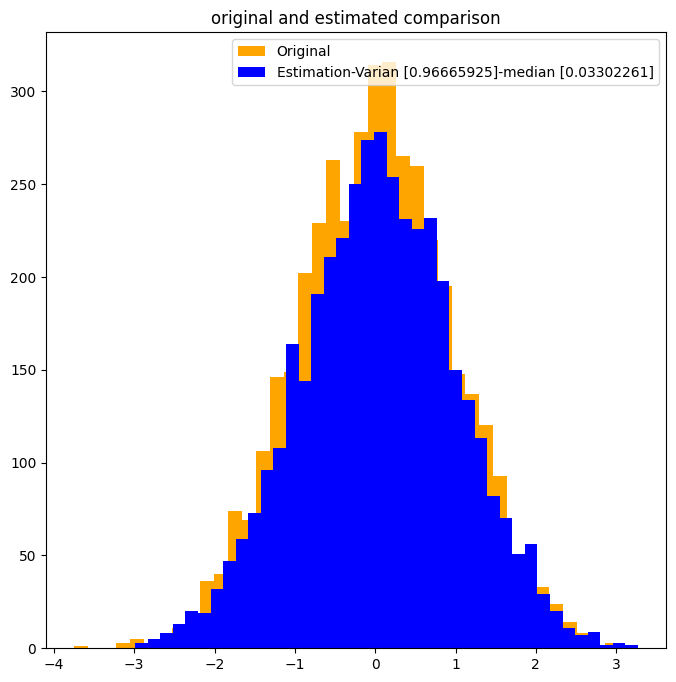

In [33]:
MVE2=MLE(Output_Circuit,plot=False) ## TENGO MIS DATOS GUARDADOS 
Values_mean = np.array([meanC-2*varC, meanC+2*varC]) ##VECTOR DE MEDIAS 
Values_var = np.array([varC/2, 1.5*varC]) # VECTOR DE VARIANZAS
espace=0.1
media_estimate,varian_estimat,gaussian_estimate=MVE2.Gaussian(Values_mean,Values_var,espace)

$$y(t) = x(t)*h(t)$$
$$E[y(t)]=E[x(t)*h(t)]$$
$$E[y(t)]=E[x(t)]*E[h(t)] \rightarrow E[x(t)] = 0.1$$
$$E[y(t)]= 0.1*E[h(t)] \rightarrow E[h(t)] = \text{impulse response median}$$
$$E[y(t)]= 0.1*-10.590686177024075$$
$$E[y(t)]= -1.0590686177024075$$

# Power Spectral Density

## Cosine + White Gaussian Noise

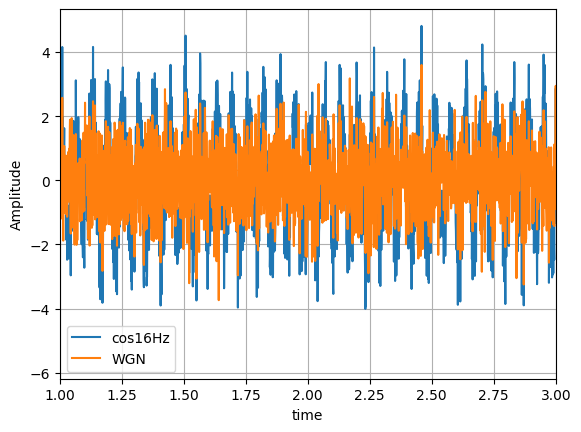

In [26]:
tsin = np.linspace(0,4,4096)

db = 5
gain = ct.db2mag(db)
cosine = gain * np.cos(2 * np.pi * 15.9154943092 * tsin)  # Señal sinusoidal de 16 Hz

new_signal = cosine + x

plt.figure()
plt.grid(True)
plt.plot(tsin,new_signal, label="cos16Hz")

plt.plot(t,x,label='WGN')
plt.xlim(1,3)
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [27]:
def autocross(x, y):
    c = np.correlate(x, y, "same")
    v = [c[i]/( len(x)-abs( i - (len(x)/2)  ) ) for i in range(len(c))]
    return v

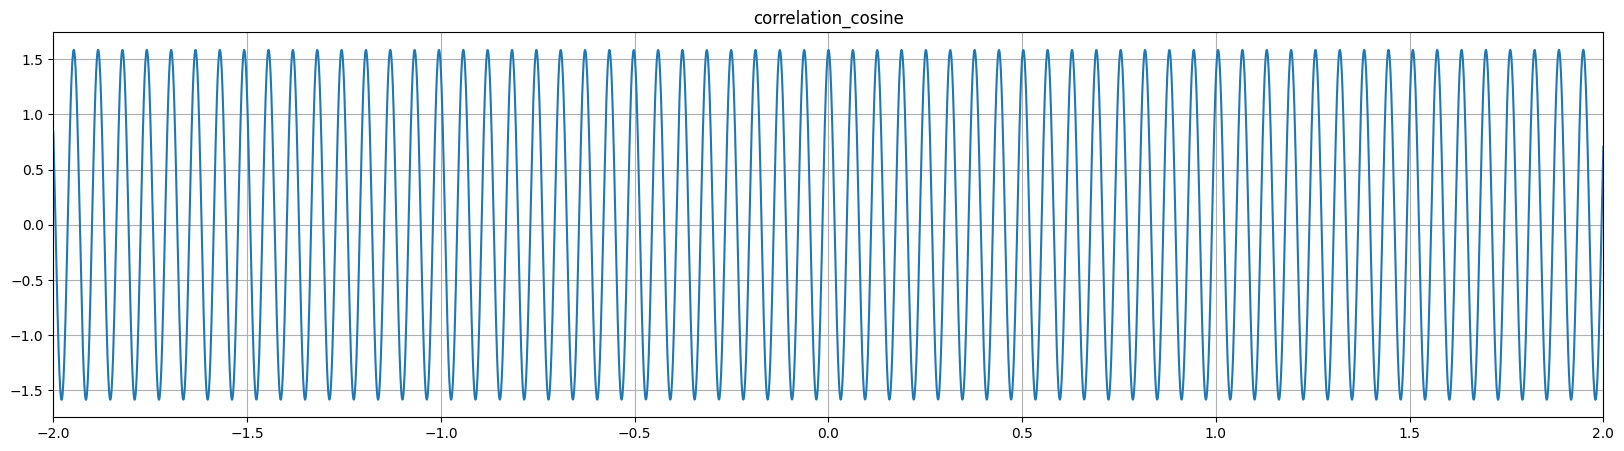

(0.8403328484566721+0j)


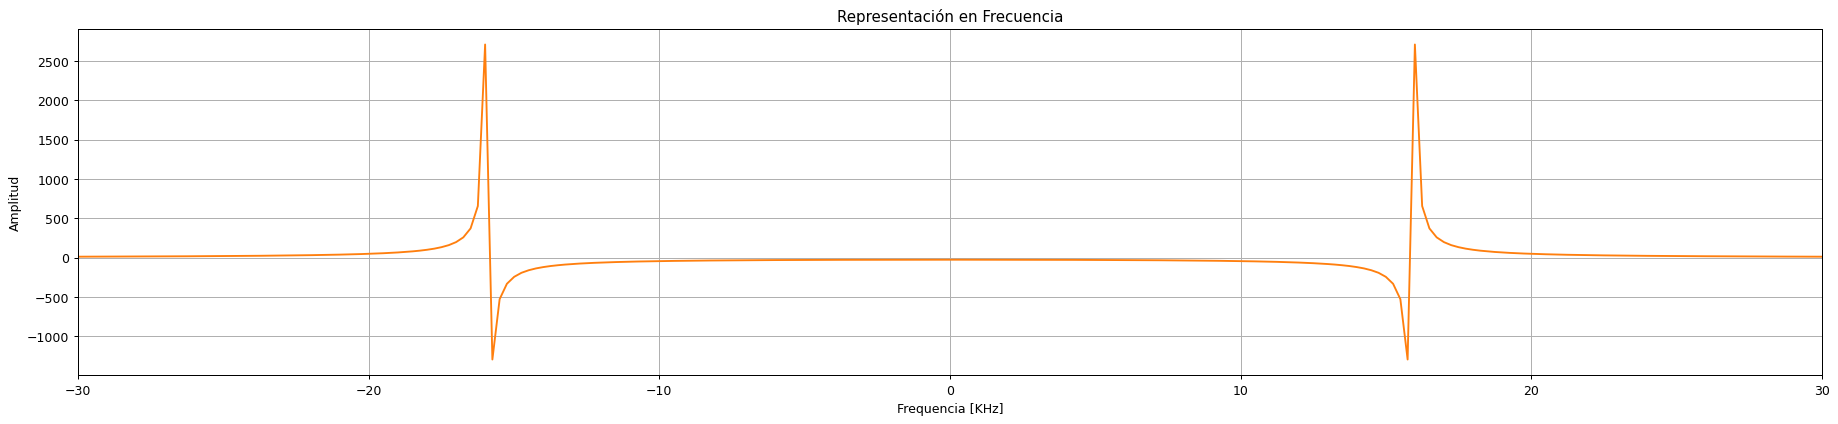

In [36]:
correlation_cosine = autocross(cosine,cosine)

plt.figure(figsize=(20,5))
plt.plot(t-2,correlation_cosine)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("correlation_cosine")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t,correlation_cosine,xmax=30,ymax=None)

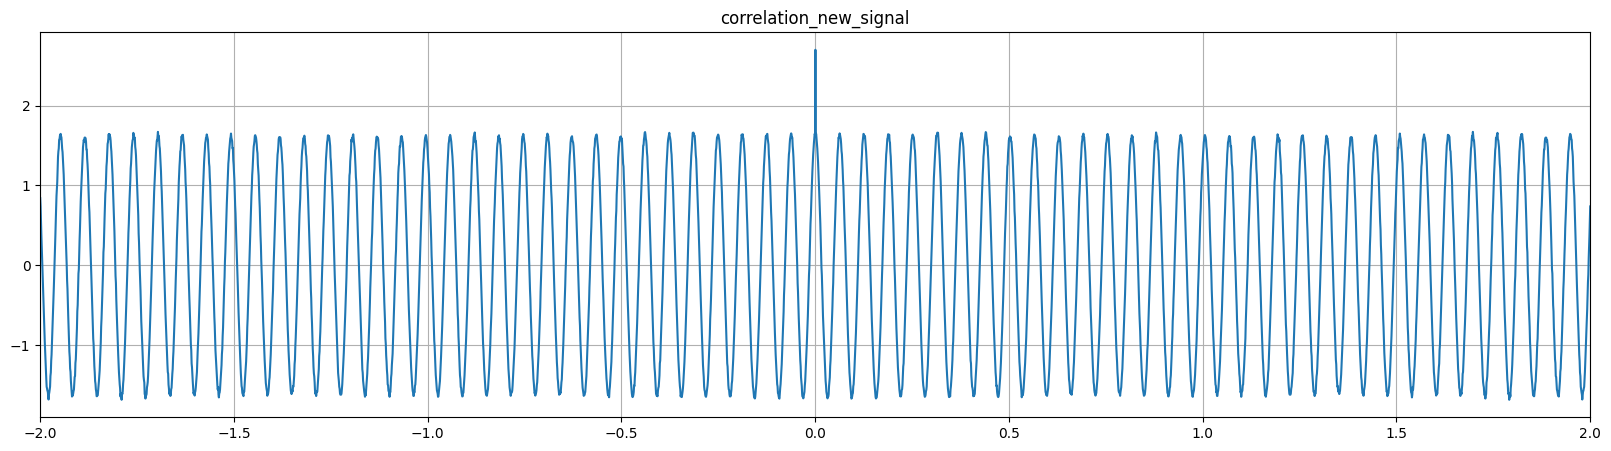

(0.8406325162656673+0j)
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


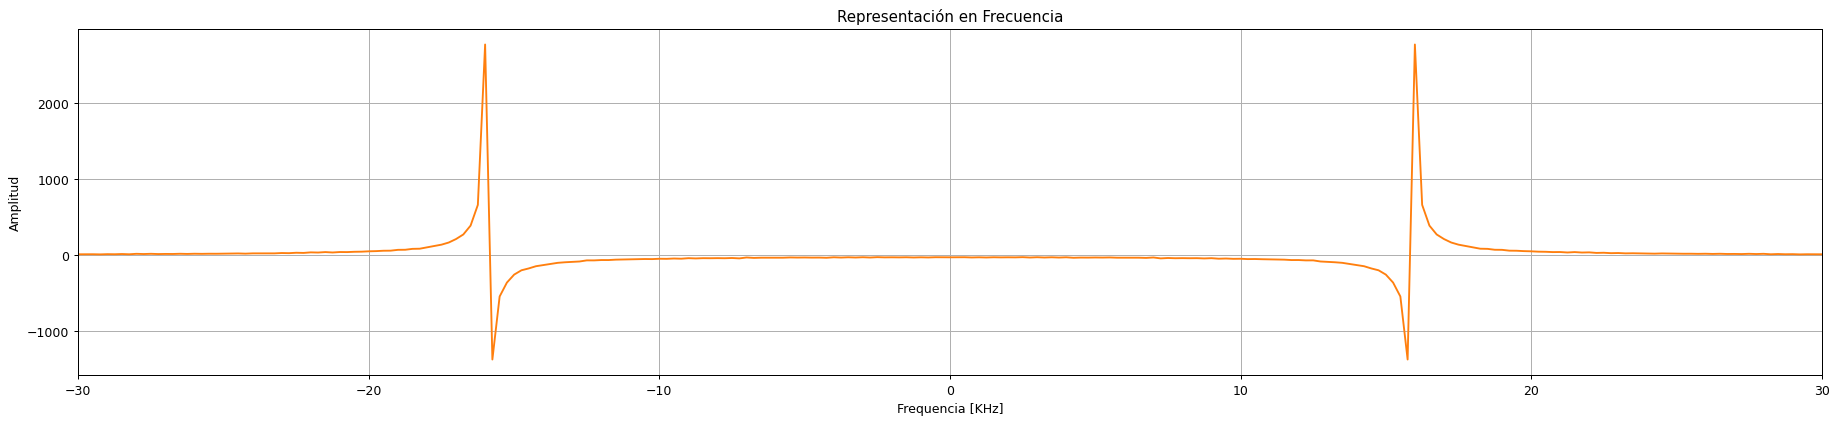

In [37]:
correlation_new_signal = autocross(new_signal,new_signal)

plt.figure(figsize=(20,5))
plt.plot(t-2,correlation_new_signal)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("correlation_new_signal")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t,correlation_new_signal,xmax=30,ymax=None)

Text(0.5, 0, 'Time')

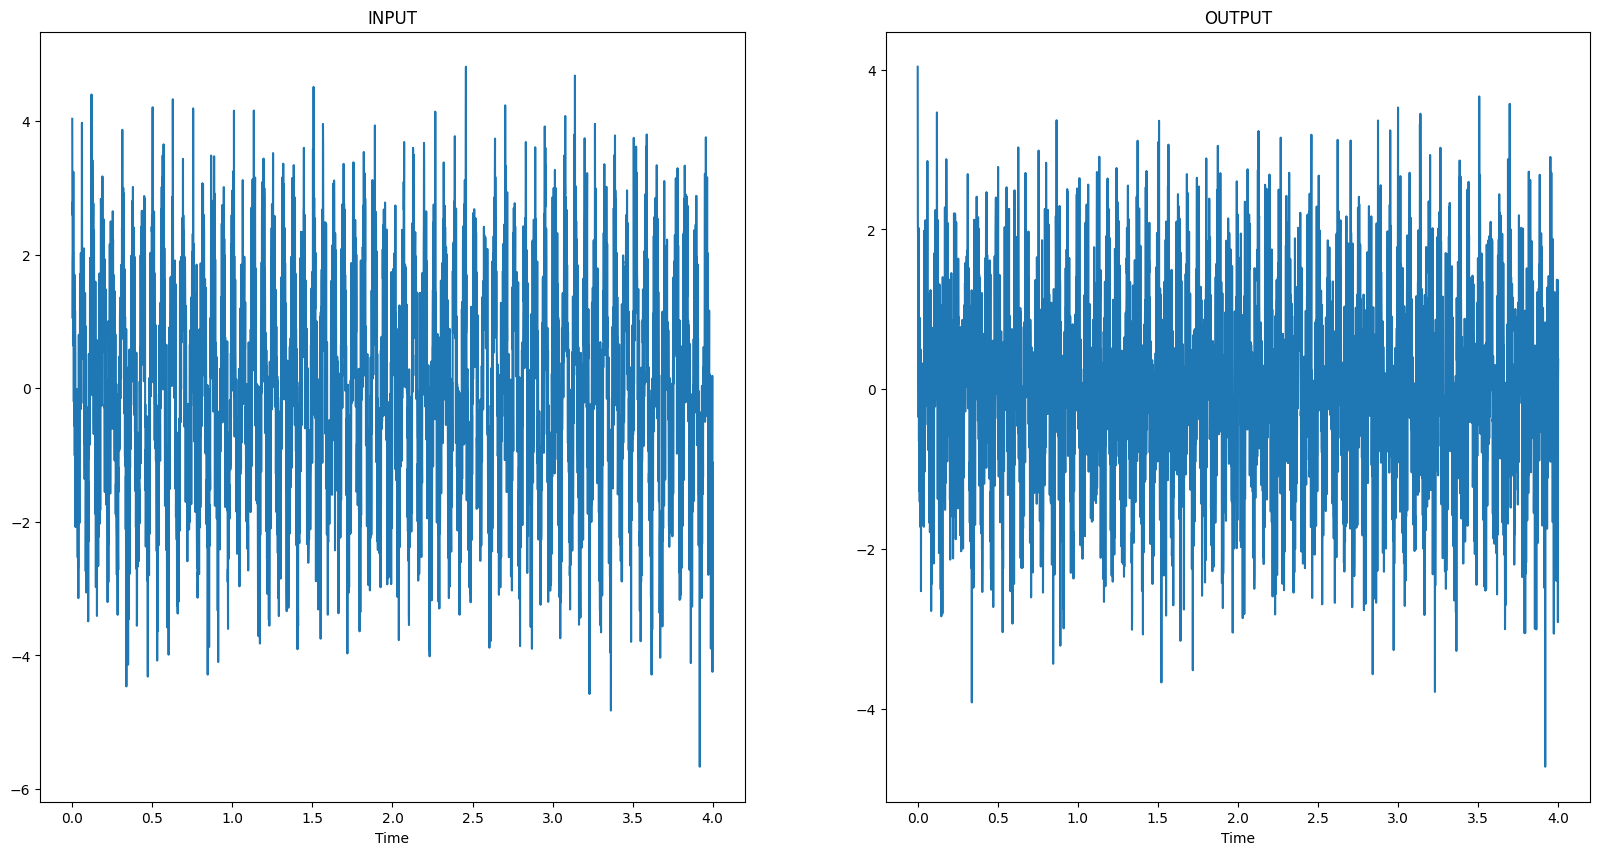

In [42]:
t = np.linspace(0,4,4096)
## INGRESAMOS LA ENTRADA EXPONENCIAL A NUESTRO CIRCUITO:
k_cosine,Output_Circuit_cosine,_=lti_system.output(new_signal, t) ##SALIDA DEL CIRCUITO.

# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t, new_signal)
axs[0].set_title("INPUT")
axs[0].set_xlabel("Time")
axs[1].plot(k_cosine, Output_Circuit_cosine)
axs[1].set_title("OUTPUT")
axs[1].set_xlabel("Time")

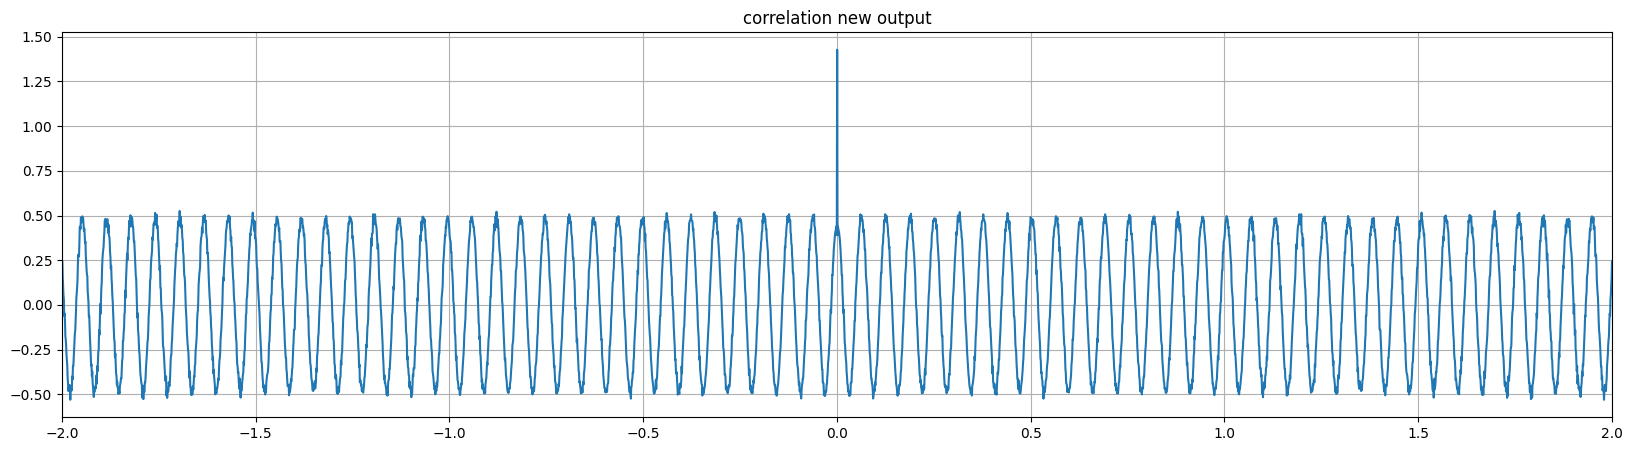

(0.24677594749103893+0j)
/shared-libs/python3.9/py/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


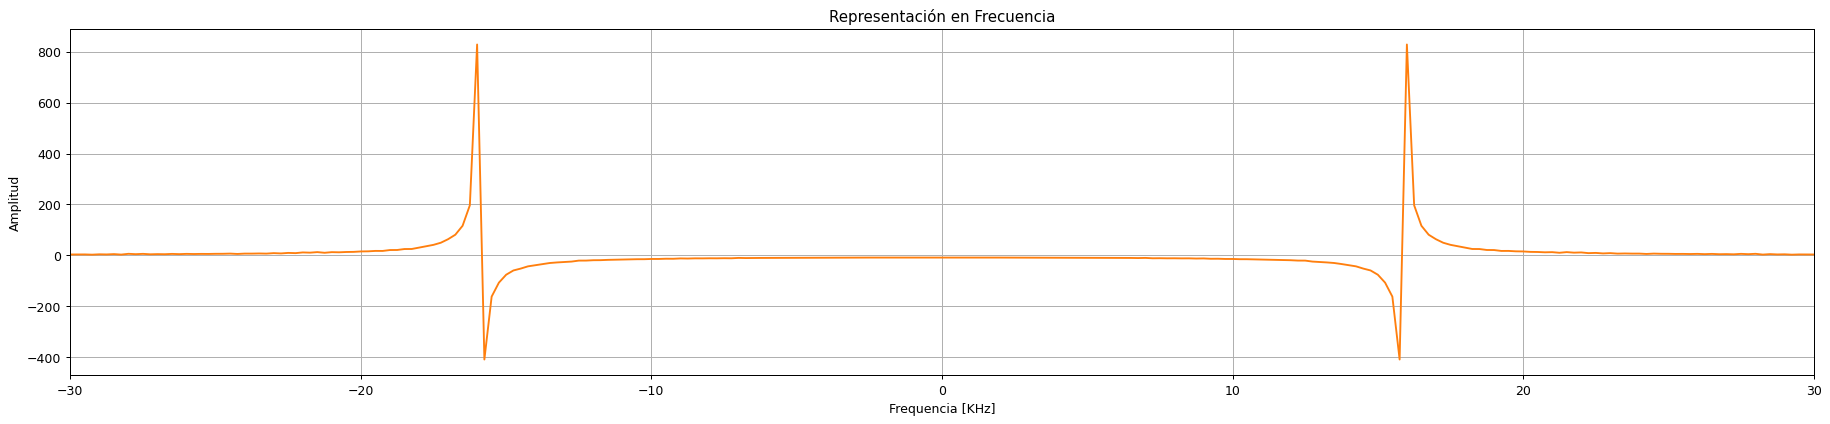

In [43]:
correlation_circuit_new = autocross(Output_Circuit_cosine,Output_Circuit_cosine)

plt.figure(figsize=(20,5))
plt.plot(t-2,correlation_circuit_new)
plt.xlim(-2,2)
hist_kws={"edgecolor":"black"}
plt.title("correlation new output")
plt.grid()
plt.show()

_ = Ploteo_tiempo_frecuencia2(t,correlation_circuit_new,xmax=30,ymax=None)

## White Gaussian Noise

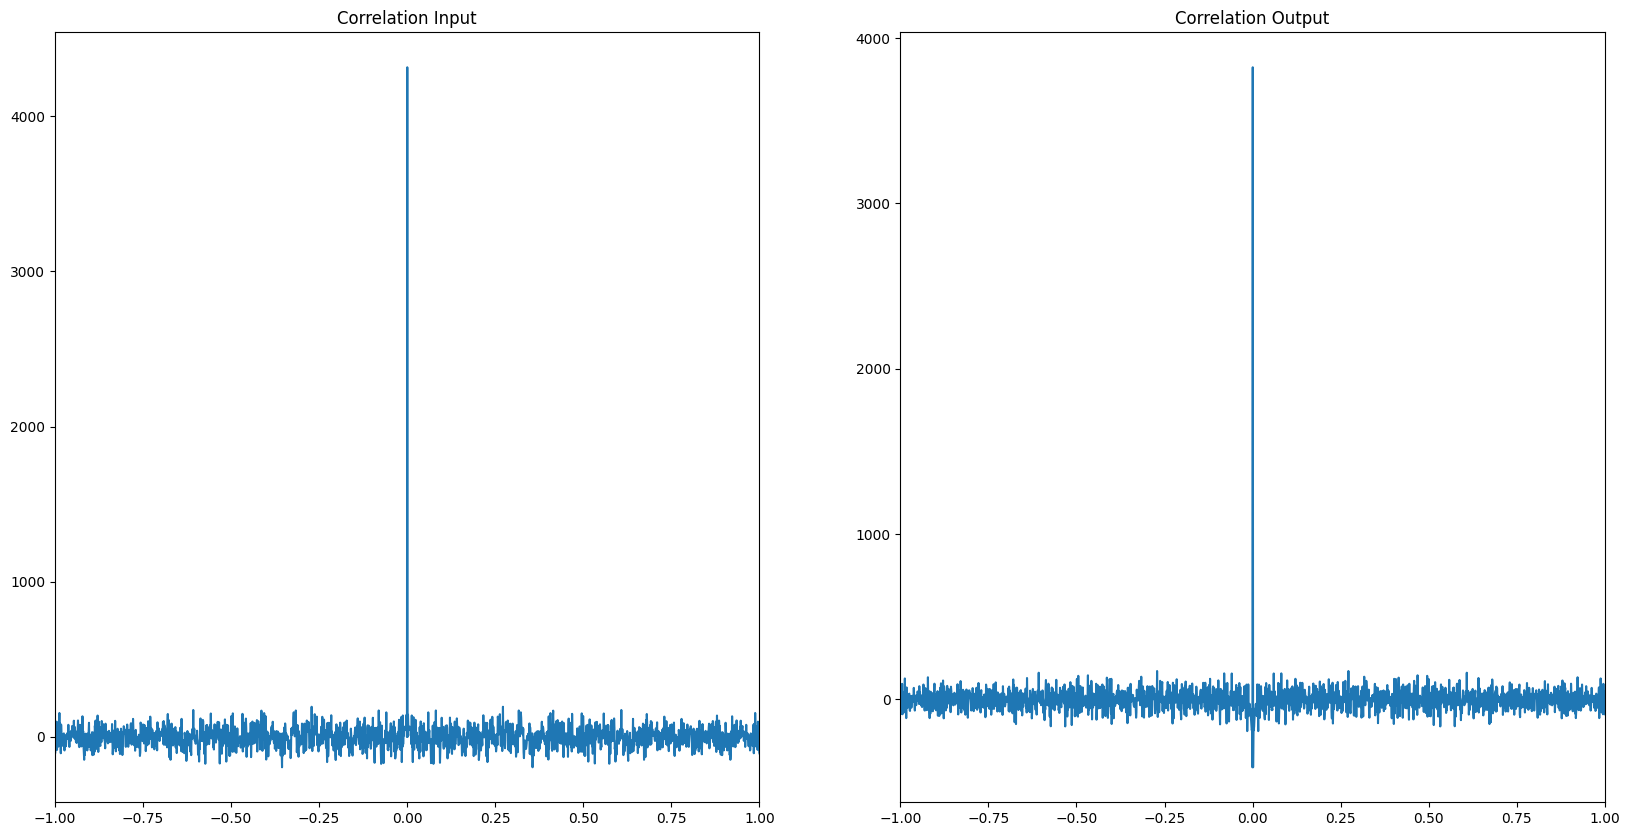

In [41]:
# COMPARAMOS ENTRADA VS SALIDA 
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(t-2,Autocorrelacion_Entrance)
axs[0].set_title("Correlation Input")
axs[0].set_xlim(-1,1)
axs[1].plot(t-2, Autocorrelacion_Output)
axs[1].set_title("Correlation Output")
axs[1].set_xlim(-1,1)

(-21.906591292115017+0j)


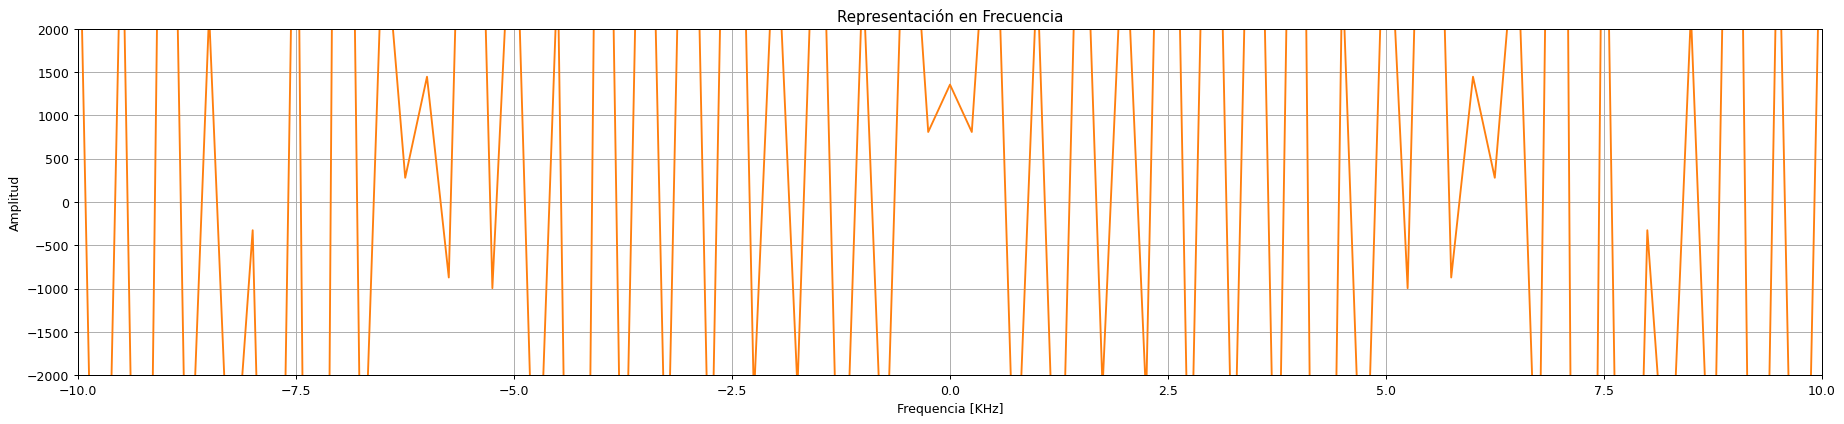

In [30]:
## GENEREMOS SU TRANSFORMADA PARA CONOCER LA DENSIDAD DE POTENCIA:
meanx = Ploteo_tiempo_frecuencia2(t,Autocorrelacion_Entrance,xmax=10,ymax=2000)

(-15.152232279855061+0j)


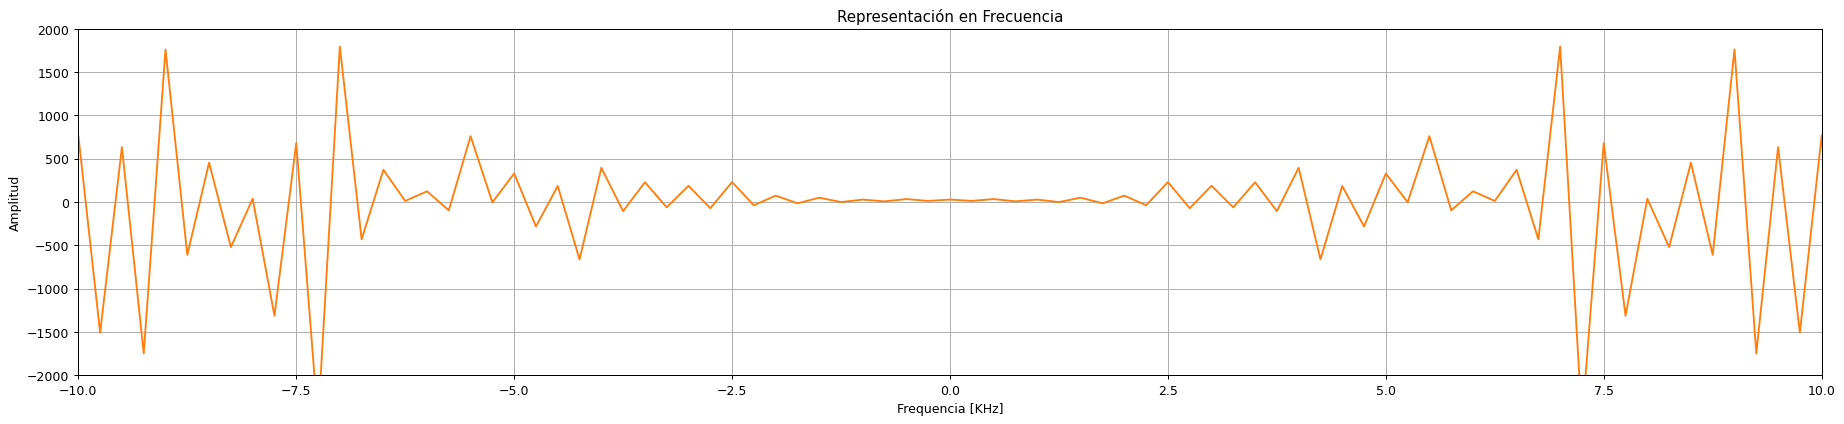

In [31]:
## GENEREMOS SU TRANSFORMADA PARA CONOCER LA DENSIDAD DE POTENCIA:
meany = Ploteo_tiempo_frecuencia2(t,Autocorrelacion_Output,xmax=10,ymax=2000)

In [35]:
Sy = np.convolve(sys,mean)
print('Estimated: ',Sy)
print('Real: ',meany)

Estimated:  [TransferFunction(array([  -12.09791504+0.j, -2574.02447682+0.j,     0.        +0.j]), array([5.5225e-01, 2.2325e+02, 1.3500e+04]))]
Real:  (-15.152232279855061+0j)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb0f6ce0-7e21-43b4-ba91-f2aeb5e6529b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>